In [7]:
import numpy as np
import pandas as pd
import pickle
#import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Retrieve pickle object
fileObj = open('data_algos.pkl', 'rb')
all_generations = pickle.load(fileObj)
fileObj.close()

In [9]:
generations_df = pd.DataFrame(all_generations)
generations_df

,radius,generation,fitness,selection_type,pop_size,mutation
0,3.176471,0,0.012153,Random Selection,10,0.0
1,0.352941,0,0.005855,Random Selection,10,0.0
2,9.294118,0,0.001821,Random Selection,10,0.0
3,10.588235,0,0.001408,Random Selection,10,0.0
4,10.705882,0,0.001378,Random Selection,10,0.0
...,...,...,...,...,...,...
2887495,17.058824,349,0.000546,Wheel Selection,100,0.1
2887496,17.176471,349,0.000538,Wheel Selection,100,0.1
2887497,17.294118,349,0.000531,Wheel Selection,100,0.1
2887498,19.529412,349,0.000417,Wheel Selection,100,0.1


In [11]:
#MSE for generation from 1 to 50
ideal_pop_size=60
filtered_generations_df = generations_df[(generations_df['pop_size'] == ideal_pop_size) & (generations_df['mutation'] == 0)]
solution=1.6841
MSES_random=[]
MSES_ranked=[]
MSES_wheel=[]
#random
random_df=filtered_generations_df[filtered_generations_df['selection_type']=='Random Selection']

for k in range(50):
    gen_random_df=random_df[random_df['generation']==k]
    squared_errors=(gen_random_df['radius']-solution)**2
    MSE_random=sum(squared_errors)/ideal_pop_size
    MSES_random.append(MSE_random)
print(MSES_random, '\n', sum(MSES_random), '\n',sum(MSES_random)/len(MSES_random), '\nRandom MSE in generation 50:',MSES_random[len(MSES_random)-1], '\n')

#ranked
ranked_df=filtered_generations_df[filtered_generations_df['selection_type']=='Ranked Selection']

for k in range(50):
    gen_ranked_df=ranked_df[ranked_df['generation']==k]
    squared_errors=(gen_ranked_df['radius']-solution)**2
    MSE_ranked=sum(squared_errors)/ideal_pop_size
    MSES_ranked.append(MSE_ranked)
print(MSES_ranked, '\n', sum(MSES_ranked), '\n',sum(MSES_ranked)/len(MSES_ranked),'\nRanked MSE in generation 50:',MSES_ranked[len(MSES_ranked)-1], '\n')

#wheel
wheel_df=filtered_generations_df[filtered_generations_df['selection_type']=='Wheel Selection']

for k in range(50):
    gen_wheel_df=wheel_df[wheel_df['generation']==k]
    squared_errors=(gen_wheel_df['radius']-solution)**2
    MSE_wheel=sum(squared_errors)/ideal_pop_size
    MSES_wheel.append(MSE_wheel)
print(MSES_wheel, '\n', sum(MSES_wheel), '\n',sum(MSES_wheel)/len(MSES_wheel),'\nWheel MSE in generation 50:',MSES_wheel[len(MSES_wheel)-1], '\n')

#print(len(MSES_wheel), len(MSES_ranked), len(MSES_random))
plt.rcParams["figure.figsize"] = (20, 12)

[266.2618304339907, 233.67088471311416, 240.7324182309919, 213.3916594074625, 194.95290858854668, 171.68694868081892, 172.44597560123412, 154.34273919985006, 167.7628551860092, 142.57793624713955, 128.87145253318337, 94.04516678923873, 87.39682323675893, 88.65162330596308, 72.36374718139561, 59.416835416689736, 47.97175520907727, 71.19910069927336, 86.48089336363321, 94.744017815767, 89.68528409027681, 87.19740436709343, 55.146207758096885, 44.78990923445213, 47.359656270207616, 25.253796177935406, 15.795250641603229, 13.06343368658593, 14.620513271361013, 15.698970664671277, 1.7043631444867358, 1.7931508722837368, 2.744747389008074, 2.9559995689388696, 2.14600575117647, 1.3669057742445212, 1.354961552791234, 1.2826987154209917, 1.5175128099999997, 1.6373994766666664, 1.8151752090772777, 1.609579038373702, 1.7881075274163782, 1.3100534097693193, 1.1728405608650518, 0.8808684270703574, 0.8298121640945788, 0.7880672275317183, 0.6864988538292962, 0.6527678965051902] 
 3227.615513371972 
 

In [12]:
ideal_pop_size = 60
solution = 1.6841

mutation_rates = [0, 0.001, 0.01, 0.05, 0.1]

for mutation_rate in mutation_rates:
    print(f"Mutation Rate: {mutation_rate}")
    
    filtered_generations_df = generations_df[(generations_df['pop_size'] == ideal_pop_size) & (generations_df['mutation'] == mutation_rate)]

    # Random Selection
    random_df = filtered_generations_df[filtered_generations_df['selection_type'] == 'Random Selection']
    MSES_random = []

    for k in range(50):
        gen_random_df = random_df[random_df['generation'] == k]
        squared_errors = (gen_random_df['radius'] - solution) ** 2
        MSE_random = sum(squared_errors) / ideal_pop_size
        MSES_random.append(MSE_random)
    print(f"Random Selection MSEs: {MSES_random[-1]} (Gen 50)")

    # Ranked Selection
    ranked_df = filtered_generations_df[filtered_generations_df['selection_type'] == 'Ranked Selection']
    MSES_ranked = []

    for k in range(50):
        gen_ranked_df = ranked_df[ranked_df['generation'] == k]
        squared_errors = (gen_ranked_df['radius'] - solution) ** 2
        MSE_ranked = sum(squared_errors) / ideal_pop_size
        MSES_ranked.append(MSE_ranked)
    print(f"Ranked Selection MSEs: {MSES_ranked[-1]} (Gen 50)")

    # Wheel Selection
    wheel_df = filtered_generations_df[filtered_generations_df['selection_type'] == 'Wheel Selection']
    MSES_wheel = []

    for k in range(50):
        gen_wheel_df = wheel_df[wheel_df['generation'] == k]
        squared_errors = (gen_wheel_df['radius'] - solution) ** 2
        MSE_wheel = sum(squared_errors) / ideal_pop_size
        MSES_wheel.append(MSE_wheel)
    print(f"Wheel Selection MSEs: {MSES_wheel[-1]} (Gen 50)")

    print("\n" + "-"*40 + "\n")


Mutation Rate: 0
Random Selection MSEs: 0.6527678965051902 (Gen 50)
Ranked Selection MSEs: 0.00137204875432526 (Gen 50)
Wheel Selection MSEs: 0.0032513105767012704 (Gen 50)

----------------------------------------

Mutation Rate: 0.001
Random Selection MSEs: 39.66396397493656 (Gen 50)
Ranked Selection MSEs: 0.00137204875432526 (Gen 50)
Wheel Selection MSEs: 1.2030969391810844 (Gen 50)

----------------------------------------

Mutation Rate: 0.01
Random Selection MSEs: 264.34604256778545 (Gen 50)
Ranked Selection MSEs: 4.706448288662053 (Gen 50)
Wheel Selection MSEs: 1.0579568469088814 (Gen 50)

----------------------------------------

Mutation Rate: 0.05
Random Selection MSEs: 167.46706478231832 (Gen 50)
Ranked Selection MSEs: 12.466276846908878 (Gen 50)
Wheel Selection MSEs: 19.35441195648212 (Gen 50)

----------------------------------------

Mutation Rate: 0.1
Random Selection MSEs: 193.1461547246482 (Gen 50)
Ranked Selection MSEs: 51.07714501299884 (Gen 50)
Wheel Selection MSEs:

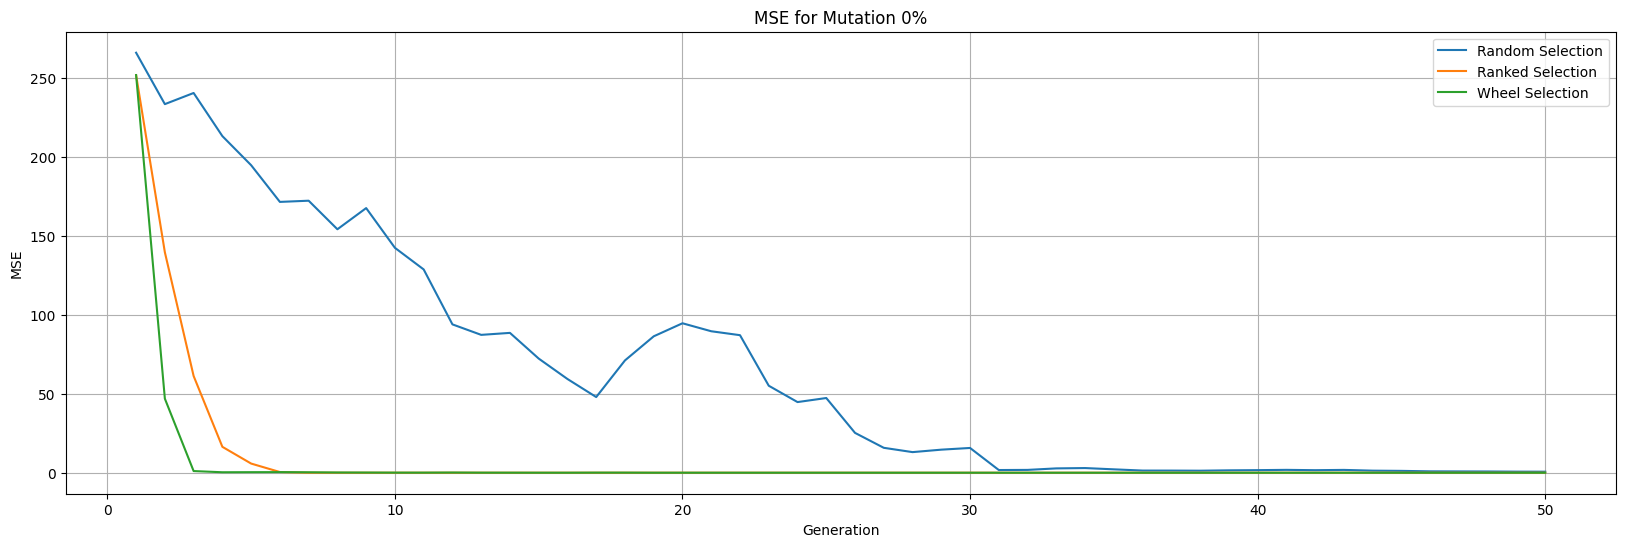

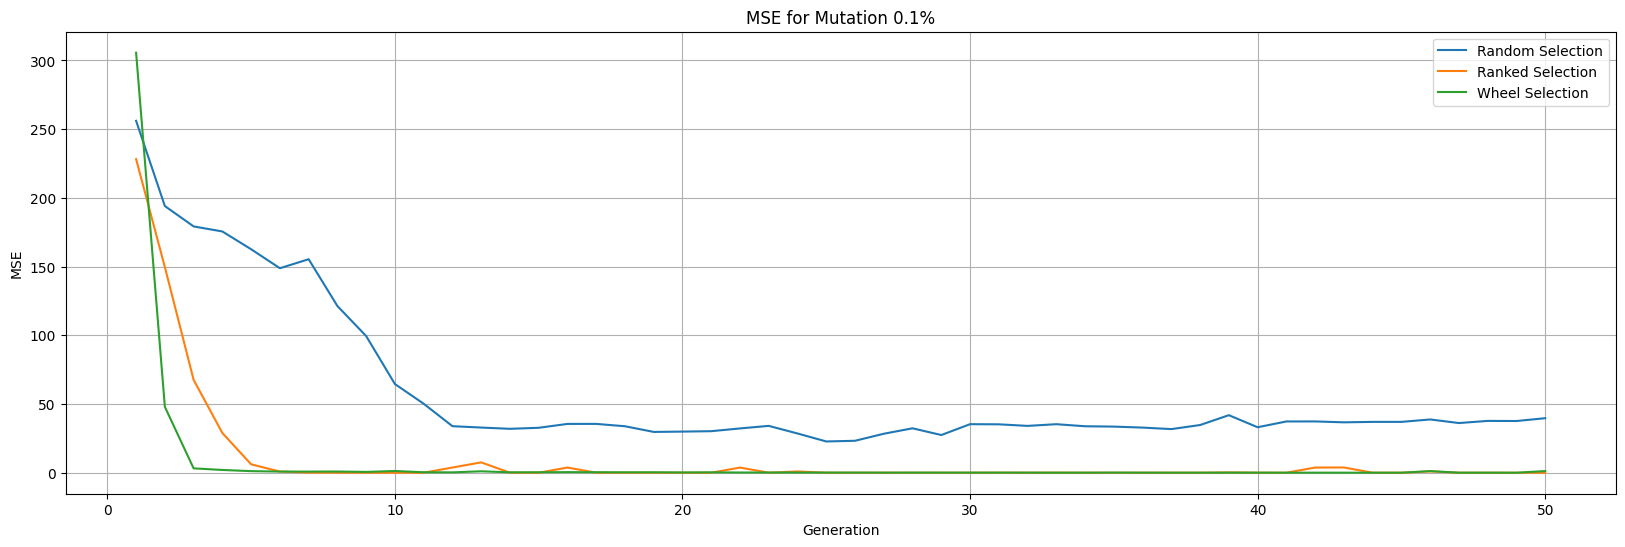

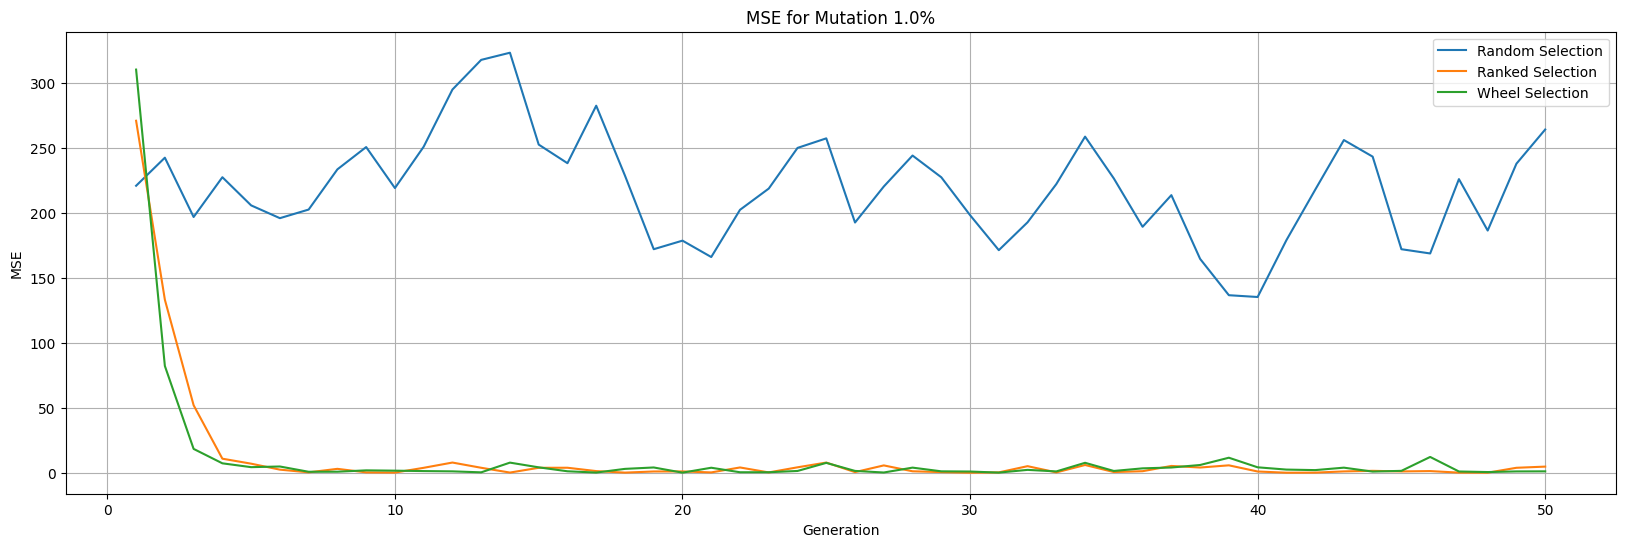

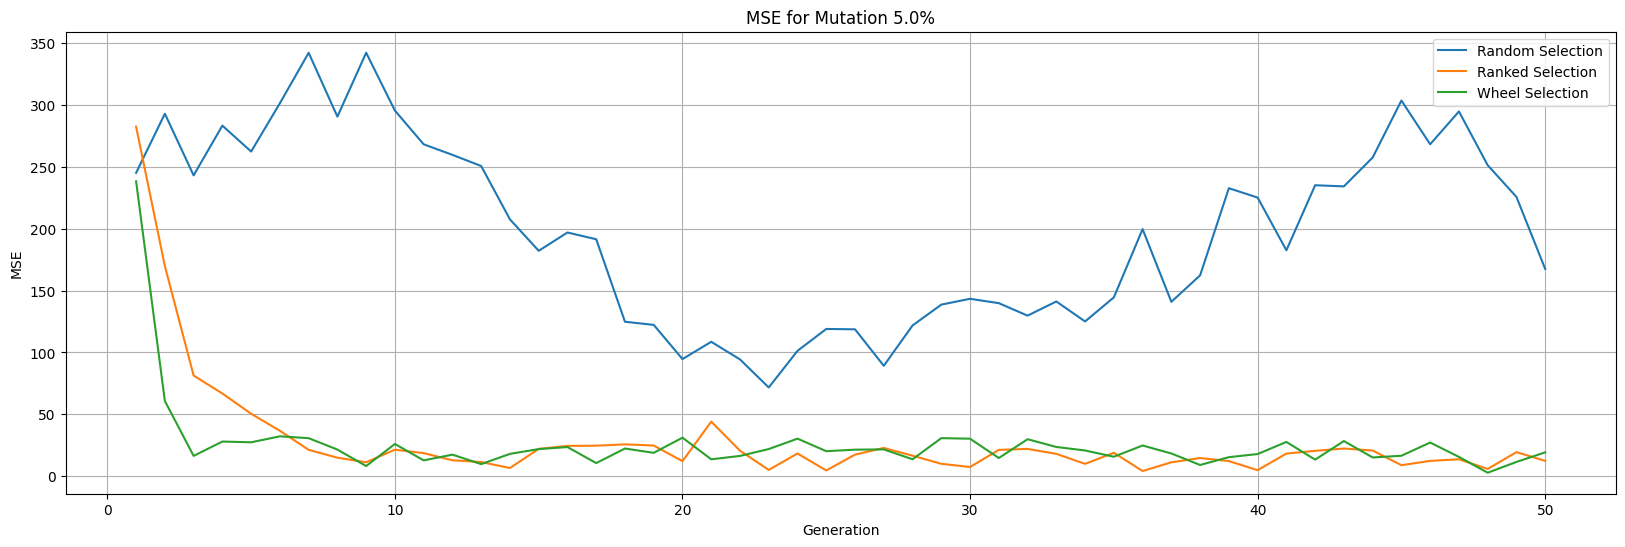

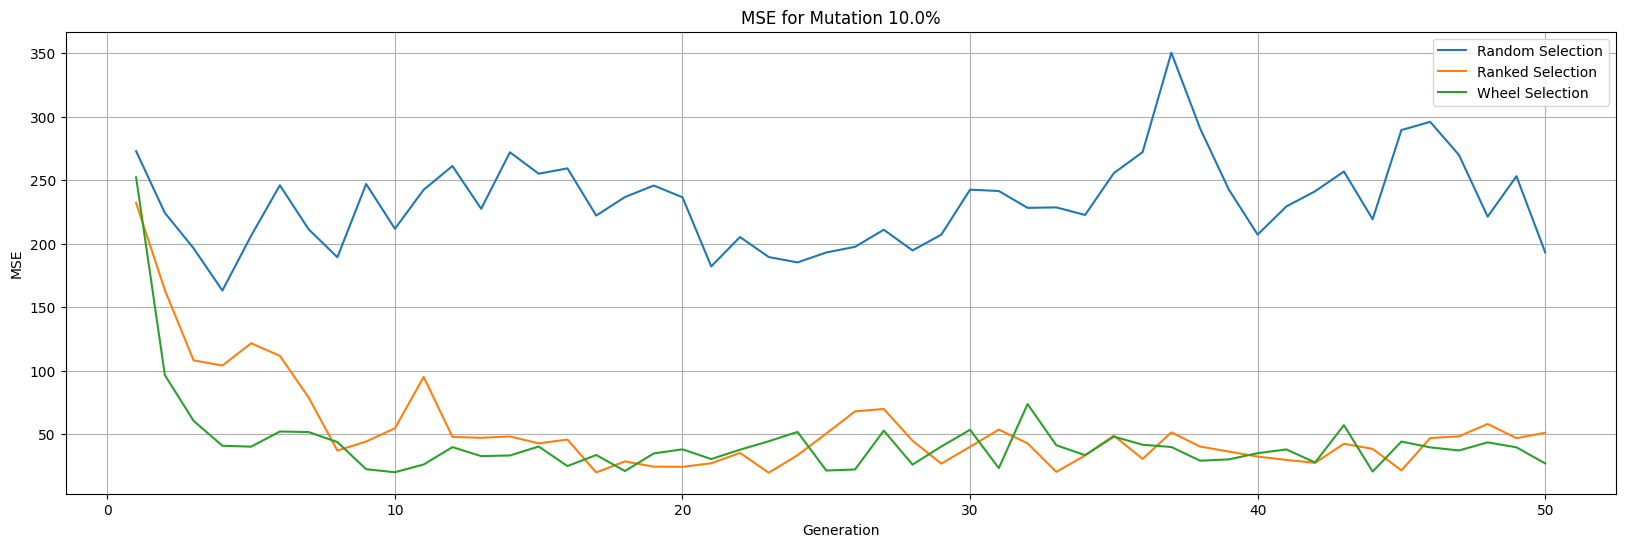

In [18]:
ideal_pop_size = 60
solution = 1.6841
mutation_rates = [0, 0.001, 0.01, 0.05, 0.1]

# Dictionary to store MSE values for each mutation rate and selection type
mse_results = {rate: {'Random': [], 'Ranked': [], 'Wheel': []} for rate in mutation_rates}

for mutation_rate in mutation_rates:
    filtered_generations_df = generations_df[(generations_df['pop_size'] == ideal_pop_size) & (generations_df['mutation'] == mutation_rate)]

    # Random Selection
    random_df = filtered_generations_df[filtered_generations_df['selection_type'] == 'Random Selection']
    MSES_random = []

    for k in range(50):
        gen_random_df = random_df[random_df['generation'] == k]
        squared_errors = (gen_random_df['radius'] - solution) ** 2
        MSE_random = sum(squared_errors) / ideal_pop_size
        MSES_random.append(MSE_random)

    mse_results[mutation_rate]['Random'] = MSES_random

    # Ranked Selection
    ranked_df = filtered_generations_df[filtered_generations_df['selection_type'] == 'Ranked Selection']
    MSES_ranked = []

    for k in range(50):
        gen_ranked_df = ranked_df[ranked_df['generation'] == k]
        squared_errors = (gen_ranked_df['radius'] - solution) ** 2
        MSE_ranked = sum(squared_errors) / ideal_pop_size
        MSES_ranked.append(MSE_ranked)

    mse_results[mutation_rate]['Ranked'] = MSES_ranked

    # Wheel Selection
    wheel_df = filtered_generations_df[filtered_generations_df['selection_type'] == 'Wheel Selection']
    MSES_wheel = []

    for k in range(50):
        gen_wheel_df = wheel_df[wheel_df['generation'] == k]
        squared_errors = (gen_wheel_df['radius'] - solution) ** 2
        MSE_wheel = sum(squared_errors) / ideal_pop_size
        MSES_wheel.append(MSE_wheel)

    mse_results[mutation_rate]['Wheel'] = MSES_wheel

# Plotting the results
plt.rcParams["figure.figsize"] = (20, 6)

for mutation_rate in mutation_rates:

    plt.plot(range(1, 51), mse_results[mutation_rate]['Random'], label='Random Selection')
    plt.plot(range(1, 51), mse_results[mutation_rate]['Ranked'], label='Ranked Selection')
    plt.plot(range(1, 51), mse_results[mutation_rate]['Wheel'], label='Wheel Selection')

    plt.title(f'MSE for Mutation {mutation_rate*100}%')
    plt.xlabel('Generation')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()
